<hr>
<br>
<h1>Activity 3 : Dengue Data Analitics</h1>
<br>
<hr>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
dengue = pd.read_csv('dataset//dengue.csv')
dengue.head(10)

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
5,June,2016,Region I,345,1
6,July,2016,Region I,1295,2
7,August,2016,Region I,1598,3
8,September,2016,Region I,1415,3
9,October,2016,Region I,1000,6


In [23]:
dengue.columns

Index(['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths'], dtype='object')

In [26]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [29]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [17]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [18]:
region = dengue.groupby('Region')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()
region

,Region,Dengue_Cases,Dengue_Deaths
0,BARMM,11537,332
1,CAR,30582,1008
2,NCR,115966,4008
3,Region I,59066,157
4,Region II,45141,193
5,Region III,131064,482
6,Region IV-A,163029,652
7,Region IV-B,30849,130
8,Region IX,47781,532
9,Region V,22167,185


In [32]:
region['Mortality Rate'] = np.round((region['Dengue_Deaths'] / region['Dengue_Cases']) * 100, 2)
region

,Region,Dengue_Cases,Dengue_Deaths,Mortality Rate
0,BARMM,11537,332,2.88
1,CAR,30582,1008,3.30
2,NCR,115966,4008,3.46
3,Region I,59066,157,0.27
4,Region II,45141,193,0.43
5,Region III,131064,482,0.37
6,Region IV-A,163029,652,0.40
7,Region IV-B,30849,130,0.42
8,Region IX,47781,532,1.11
9,Region V,22167,185,0.83


In [35]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [38]:
island = {
    #Luzon category
    'NCR': 'Luzon',
    'CAR': 'Luzon',
    'Region I': 'Luzon',
    'Region II': 'Luzon',
    'Region III': 'Luzon',
    'Region IV-A': 'Luzon',
    'Region IV-B': 'Luzon',
    'Region V': 'Luzon',
    #Visayas category
    'Region VI': 'Visayas',
    'Region VII': 'Visayas',
    'Region VIII': 'Visayas',
    #Mindanao category
    'Region IX': 'Mindanao',
    'Region X': 'Mindanao',
    'Region XI': 'Mindanao',
    'Region XII': 'Mindanao',
    'Region XIII': 'Mindanao',
    'BARMM': 'Mindanao',
}

In [40]:
dengue['Island'] = dengue['Region'].map(island)
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Island
0,January,2016,Region I,705,1,Luzon
1,February,2016,Region I,374,0,Luzon
2,March,2016,Region I,276,0,Luzon
3,April,2016,Region I,240,2,Luzon
4,May,2016,Region I,243,1,Luzon
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,Mindanao
1016,September,2020,BARMM,16,8,Mindanao
1017,October,2020,BARMM,13,9,Mindanao
1018,November,2020,BARMM,15,1,Mindanao


<hr>
<br>
<h2>Q1 : How do dengue cases vary each month across different years?</h2>
<br>
<hr>

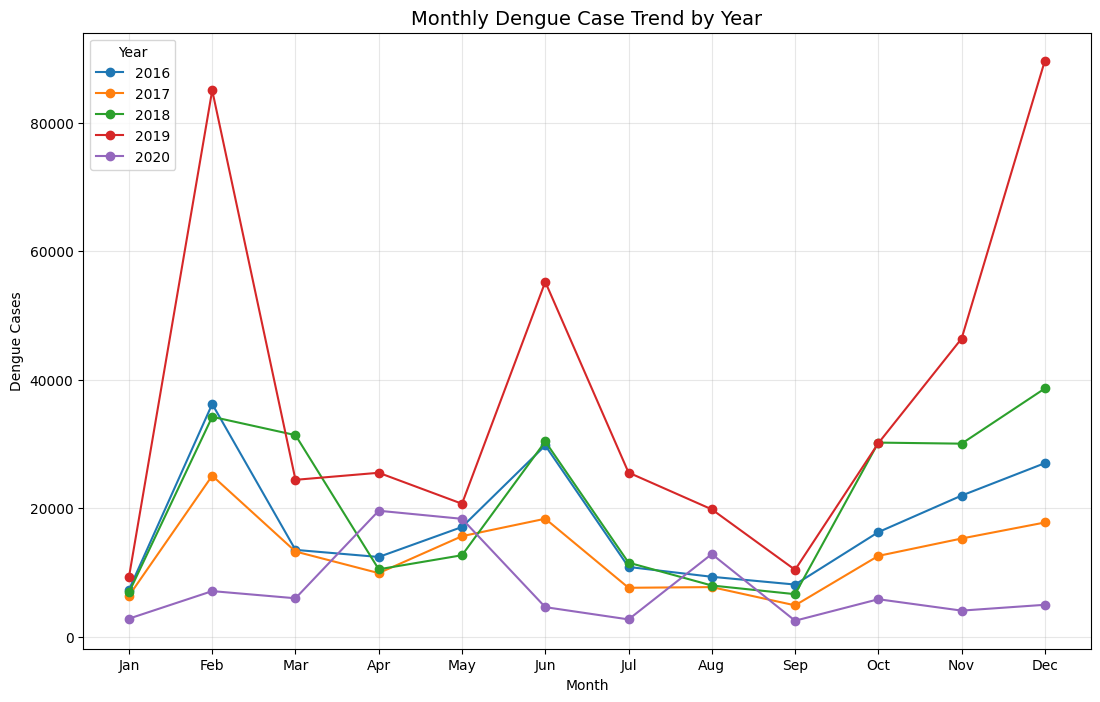

In [47]:
dengue_trend = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum()
data = dengue_trend.unstack(level=0)
data.plot(marker='o',figsize=(13, 8))
plt.title('Monthly Dengue Case Trend by Year', fontsize=14)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.grid(alpha=0.3)
plt.legend(title='Year')
plt.show()

<hr>
<br>
<h2>INSIGHTS : The line chart shows that dengue cases consistently rise around the rainy months across all years, highlighting a seasonal pattern that repeats annually.</h2>
<br>
<hr>

<hr>
<br>
<h2>Q2 : Which year recorded the highest number of dengue cases?</h2>
<br>
<hr>

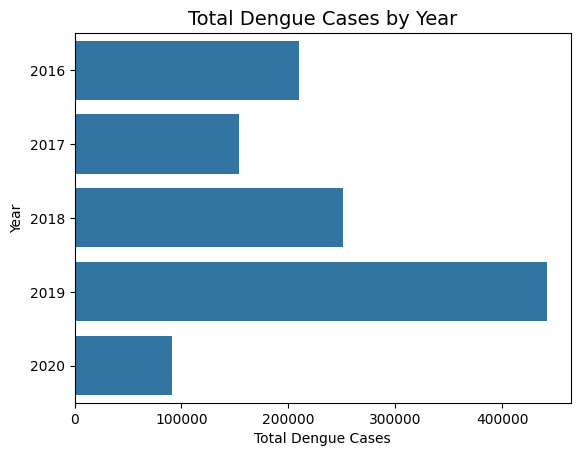

In [45]:
sns.barplot(data=dengue.groupby('Year')[['Dengue_Cases']].sum().reset_index(), orient='h', y='Year', x='Dengue_Cases')
plt.title('Total Dengue Cases by Year', fontsize=14)
plt.xlabel('Total Dengue Cases')
plt.ylabel('Year')
plt.show()

<hr>
<br>
<h2>INSIGHTS : Certain years show noticeable spikes in dengue cases, possibly due to stronger rainy seasons or inconsistent preventive campaigns.</h2>
<br>
<hr>

<hr>
<br>
<h2> Q3 : Which regions have the highest number of reported dengue cases?</h2>
<br>
<hr>

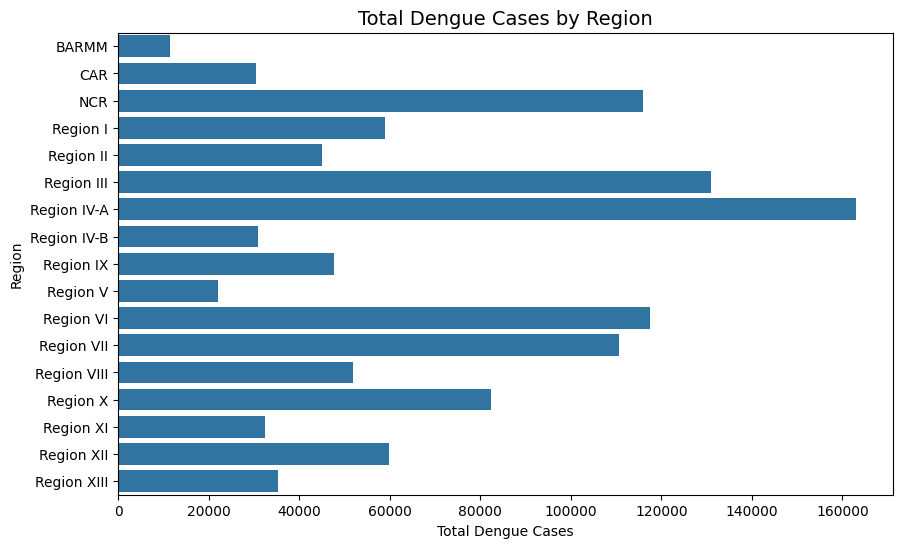

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='Dengue_Cases', y='Region', data=dengue, estimator=sum, ci=None)
plt.title('Total Dengue Cases by Region', fontsize=14)
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.show()

<hr>
<br>
<h2>INSIGHTS : The same regions with high case counts also show higher deaths, reflecting how outbreak scale directly affects fatality risks.</h2>
<br>
<hr>

<hr>
<br>
<h2> Q4 : Which regions have the highest dengue mortality rates?</h2>
<br>
<hr>

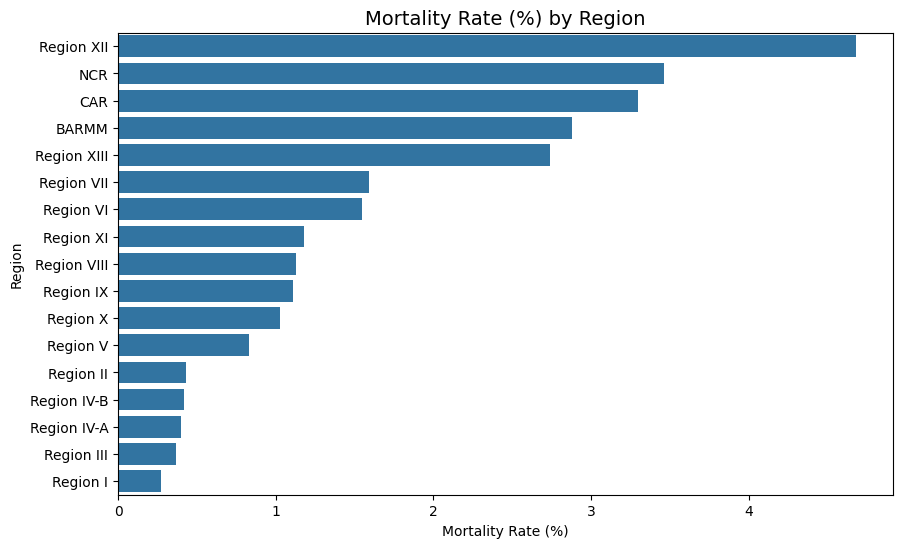

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='Mortality Rate', y='Region', data=region.sort_values('Mortality Rate', ascending=False))
plt.title('Mortality Rate (%) by Region', fontsize=14)
plt.xlabel('Mortality Rate (%)')
plt.ylabel('Region')
plt.show()

<hr>
<br>
<h2>INSIGHTS : Some regions report higher mortality despite fewer total cases possibly indicating slower response times or hospital shortages.</h2>
<br>
<hr>

<hr>
<br>
<h2>Q5 : Which island group experiences the most dengue cases?</h2>
<br>
<hr>

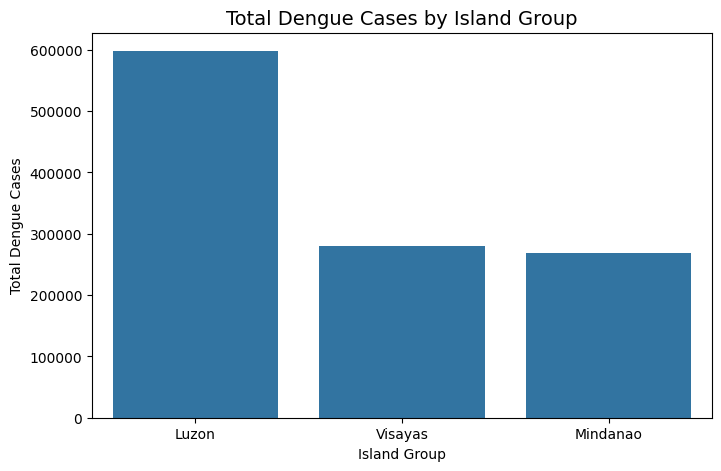

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Island', y='Dengue_Cases', data=dengue, estimator=sum, ci=None)
plt.title('Total Dengue Cases by Island Group', fontsize=14)
plt.xlabel('Island Group')
plt.ylabel('Total Dengue Cases')
plt.show()

<hr>
<br>
<h2>INSIGHTS : Luzon often leads in dengue cases, likely due to urban density and the presence of major population centers like Metro Manila.</h2>
<br>
<hr>

<hr>
<br>
<h2>Q6 : Which island group experiences the most dengue cases?</h2>
<br>
<hr>

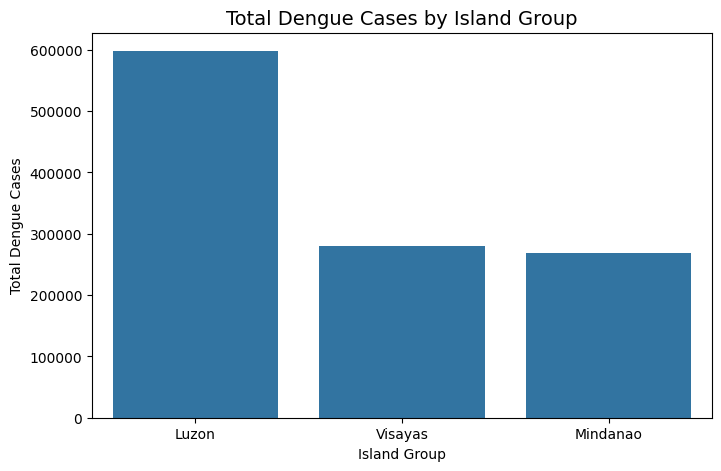

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='Island', y='Dengue_Cases', data=dengue, estimator=sum, ci=None)
plt.title('Total Dengue Cases by Island Group', fontsize=14)
plt.xlabel('Island Group')
plt.ylabel('Total Dengue Cases')
plt.show()

<hr>
<br>
<h2>INSIGHTS : Luzon often leads in dengue cases, likely due to urban density and the presence of major population centers like Metro Manila.</h2>
<br>
<hr>

<hr>
<br>
<h2>Q7 : Is there a relationship between dengue cases and dengue deaths?</h2>
<br>
<hr>

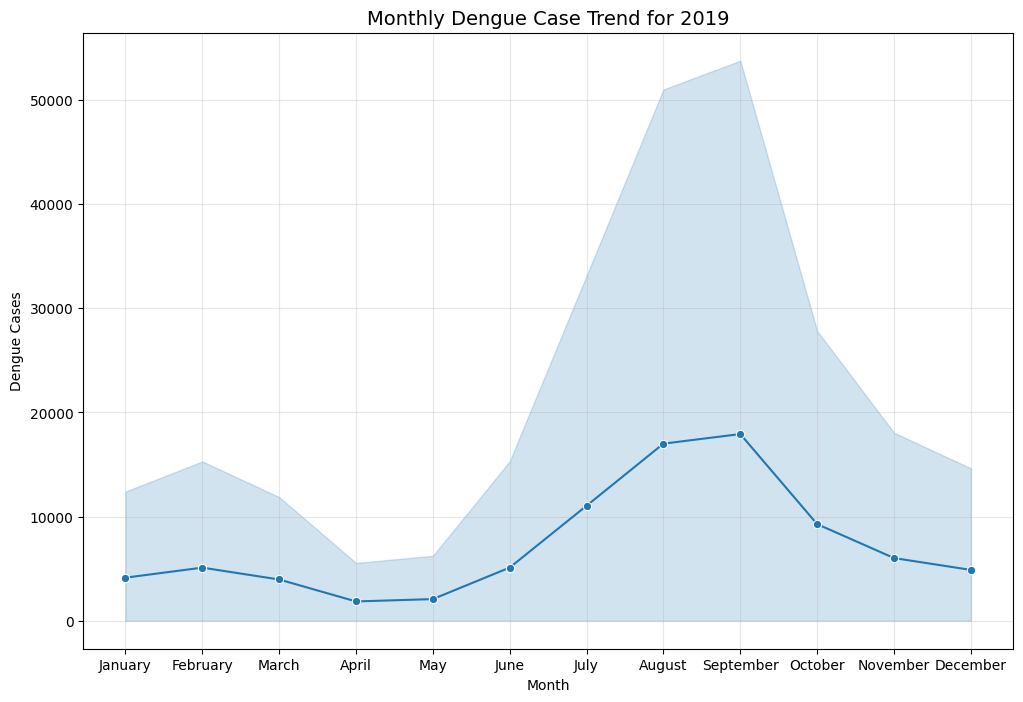

In [50]:
region_12_2019 = dengue[dengue['Year'] == 2019]
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
dengue_2019 = region_12_2019.groupby(['Year', 'Month'])['Dengue_Cases'].sum().reset_index(name='Dengue Cases')
dengue_2019['Month'] = pd.Categorical(dengue_2019['Month'], categories=month_order, ordered=True)

# Plot monthly trend for 2019
plt.gcf().set_size_inches(12,8)
sns.lineplot(data=dengue_2019, x='Month', y='Dengue Cases', marker='o')
plt.title('Monthly Dengue Case Trend for 2019', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.grid(alpha=0.3)
plt.show()

<hr>
<br>
<h2>INSIGHTS : The 2019 trend shows dengue cases climbing rapidly mid-year and peaking around the rainy season, then gradually declining toward the year’s end showing how weather strongly influences outbreak intensity.</h2>
<br>
<hr>

<hr>
<br>
<h2>Q8 : How does the dengue mortality rate change throughout the months?</h2>
<br>
<hr>

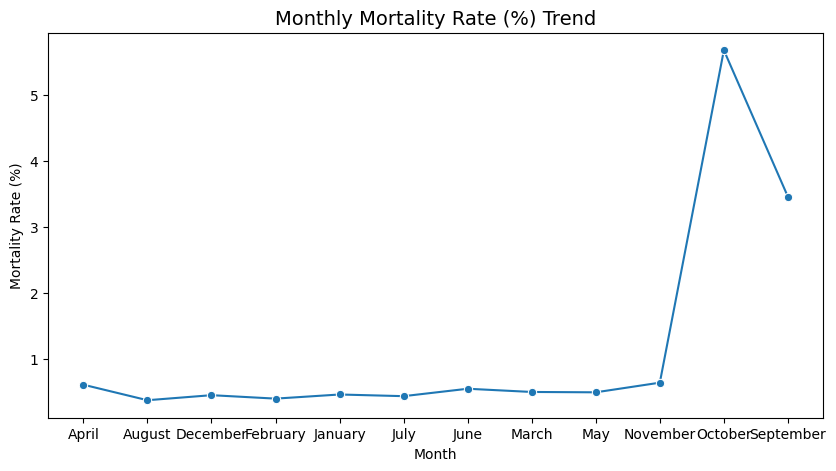

In [52]:
monthly_mortality = dengue.groupby('Month')[['Dengue_Cases','Dengue_Deaths']].sum()
monthly_mortality['Mortality Rate'] = (monthly_mortality['Dengue_Deaths']/monthly_mortality['Dengue_Cases'])*100

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_mortality.index, y='Mortality Rate', data=monthly_mortality, marker='o')
plt.title('Monthly Mortality Rate (%) Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Mortality Rate (%)')
plt.show()

<hr>
<br>
<h2>INSIGHTS : Mortality rates fluctuate slightly across months, suggesting changes in outbreak severity or healthcare response speed..</h2>
<br>
<hr>

<hr>
<br>
<h2>Q9 : How are dengue cases distributed among different regions?</h2>
<br>
<hr>

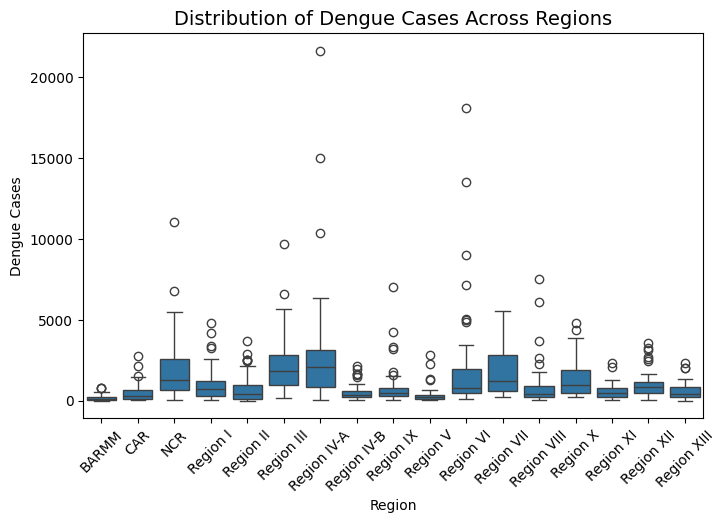

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Region', y='Dengue_Cases', data=dengue)
plt.title('Distribution of Dengue Cases Across Regions', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<hr>
<br>
<h2>INSIGHTS : Luzon often leads in dengue cases, likely due to urban density and the presence of major population centers like Metro Manila.</h2>
<br>
<hr>

<hr>
<br>
<h2>Q10 : How have dengue cases accumulated through the years?</h2>
<br>
<hr>

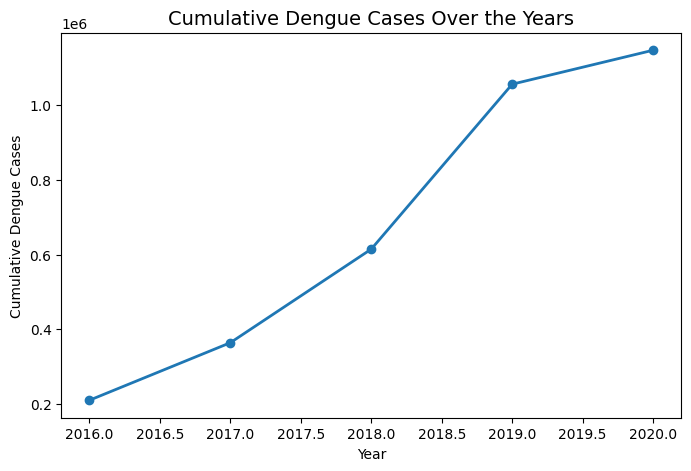

In [54]:
cumulative = dengue.groupby('Year')['Dengue_Cases'].sum().cumsum()

plt.figure(figsize=(8,5))
plt.plot(cumulative.index, cumulative.values, marker='o', linewidth=2)
plt.title('Cumulative Dengue Cases Over the Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Cumulative Dengue Cases')
plt.show()

<hr>
<br>
<h2>INSIGHTS : The consistent rise in cumulative cases reminds us that dengue remains a long-term health challenge requiring ongoing prevention and awareness.</h2>
<br>
<hr>